In [4]:
pip install -r requirements.txt

  Using cached geopandas-1.0.1-py3-none-any.whl.metadata (2.2 kB)
  Using cached folium-0.19.5-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached shapely-2.0.7-cp312-cp312-win_amd64.whl.metadata (7.1 kB)
  Using cached pyogrio-0.10.0-cp312-cp312-win_amd64.whl.metadata (5.6 kB)
  Using cached pyproj-3.7.1-cp312-cp312-win_amd64.whl.metadata (31 kB)
  Using cached branca-0.8.1-py3-none-any.whl.metadata (1.5 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached xyzservices-2025.1.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached certifi-2025.1.31-py3-none-any.whl.metadata (2.5 kB)
  Using cached charset_normalizer-3.4.1-cp312-cp312-win_amd64.whl.metadata (36 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached urllib3-2.3.0-py3-none-any.whl.metadata (6.5 kB)
Using cached geopandas-1.0.1-py3-none-any.whl (323 kB)
Using cached folium-0.19.5-py2.py3-none-any.whl (110 kB)
   ---------------------------------------- 0.0/24.5 MB ? eta 

In [237]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import rasterio
import geopandas as gpd

In [30]:
nepal='./Shape_Data/local_unit.shp'
df=gpd.read_file('./Shape_Data/local_unit.shp')
df.head()

,STATE_CODE,DISTRICT,GaPa_NaPa,Type_GN,Province,geometry
0,1,TAPLEJUNG,Aathrai Tribeni,Gaunpalika,1,"POLYGON ((87.60985 27.37043, 87.61107 27.36943..."
1,1,TAPLEJUNG,Maiwakhola,Gaunpalika,1,"POLYGON ((87.50402 27.42901, 87.50672 27.42831..."
2,1,TAPLEJUNG,Meringden,Gaunpalika,1,"POLYGON ((87.51272 27.56894, 87.51255 27.56859..."
3,1,TAPLEJUNG,Mikwakhola,Gaunpalika,1,"POLYGON ((87.6885 27.70975, 87.68891 27.70938,..."
4,1,TAPLEJUNG,Phaktanglung,Gaunpalika,1,"POLYGON ((87.83673 27.95137, 87.83735 27.95119..."


In [24]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   STATE_CODE  777 non-null    int32   
 1   DISTRICT    777 non-null    object  
 2   GaPa_NaPa   777 non-null    object  
 3   Type_GN     777 non-null    object  
 4   Province    777 non-null    object  
 5   geometry    777 non-null    geometry
dtypes: geometry(1), int32(1), object(4)
memory usage: 33.5+ KB


In [18]:
df.crs

<Geographic 2D CRS: GEOGCS["NepalDD",DATUM["D_Everest_Bangladesh",SPHE ...>
Name: NepalDD
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: D_Everest_Bangladesh
- Ellipsoid: Everest 1830 (1937 Adjustment)
- Prime Meridian: Greenwich

In [20]:
df.geometry

0      POLYGON ((87.60985 27.37043, 87.61107 27.36943...
1      POLYGON ((87.50402 27.42901, 87.50672 27.42831...
2      POLYGON ((87.51272 27.56894, 87.51255 27.56859...
3      POLYGON ((87.6885 27.70975, 87.68891 27.70938,...
4      POLYGON ((87.83673 27.95137, 87.83735 27.95119...
                             ...                        
772    POLYGON ((84.32537 27.68957, 84.32562 27.6894,...
773    POLYGON ((82.65382 28.65759, 82.65428 28.65724...
774    POLYGON ((82.76718 28.80407, 82.76748 28.80383...
775    POLYGON ((82.67327 28.85214, 82.67373 28.85205...
776    POLYGON ((82.87365 28.83199, 82.87402 28.83178...
Name: geometry, Length: 777, dtype: geometry

In [22]:
df.describe()

,STATE_CODE
count,777.000000
mean,3.651223
std,2.000799
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,7.000000


In [24]:
df.isnull().sum() #checking for missing values if any

STATE_CODE    0
DISTRICT      0
GaPa_NaPa     0
Type_GN       0
Province      0
geometry      0
dtype: int64

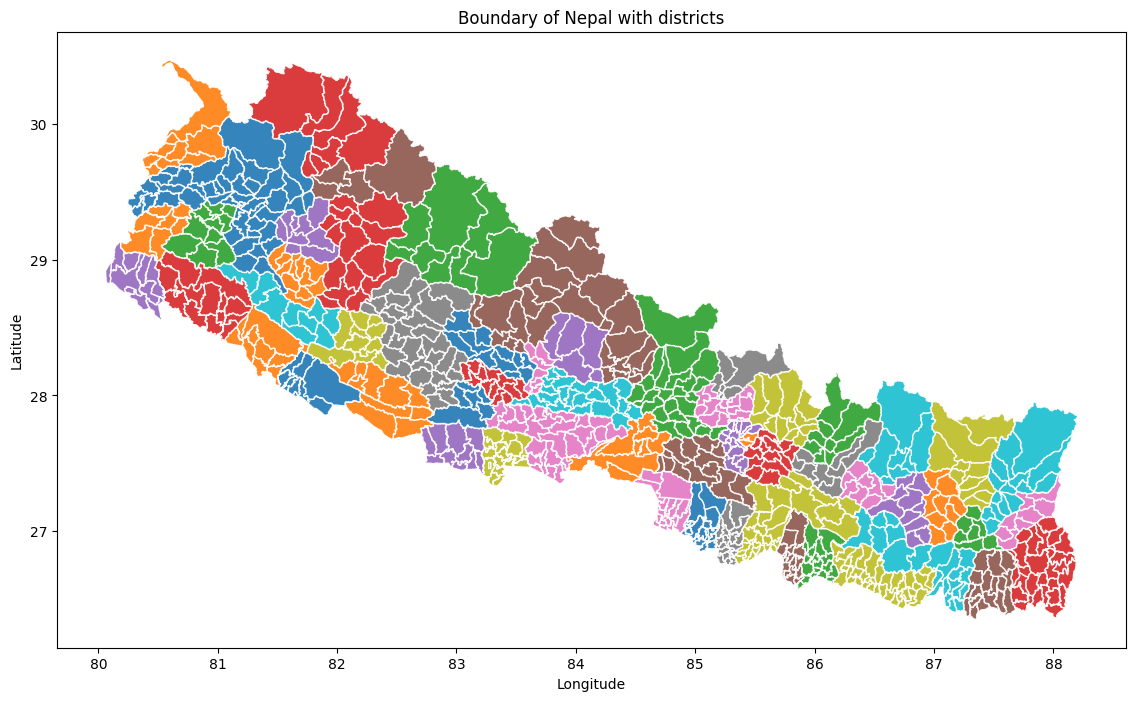

In [17]:
ax=df.plot(figsize=(14,8), column='DISTRICT',edgecolor='white',alpha=0.9)
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')
ax.set_title('Boundary of Nepal with districts')
plt.show()

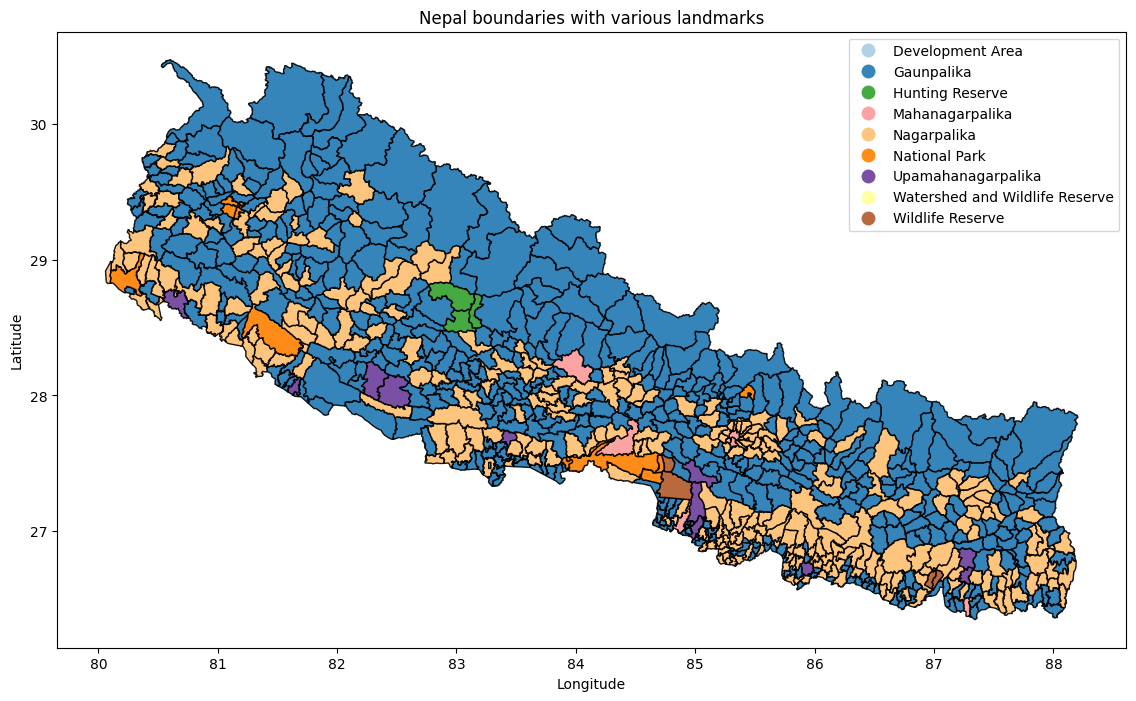

In [88]:
df.plot(figsize=(14,8), column='Type_GN',legend=True,cmap='Paired',edgecolor='black',alpha=0.9)
plt.title('Nepal boundaries with various landmarks')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [21]:
precipitation_path_2020="./nepal_climate_data/nepal_precipitation_2020.tif"
precipitation_path_2050="./nepal_climate_data/nepal_precipitation_2050.tif"
temperature_path_2020="./nepal_climate_data/nepal_temperature_2020.tif"
temperature_path_2050="./nepal_climate_data/nepal_temperature_2050.tif"

In [27]:
#Load temperature data from tif file
with rasterio.open(temperature_path_2020) as src1:
    temp_data=src1.read(4) #read the 4th band (temperature data), most appropriate min/max
    extent=src1.bounds #get the extend of raster data ie top bottom left right

#printing the shape and extend of the raster data
print(f"Shape of the raster data : {temp_data.shape}")
print(f"extend of the raster data : {extent}")

#checking out the min and max temp
min_temp=np.min(temp_data)
max_temp=np.max(temp_data)
print(f"Minumum temperature : {min_temp}")
print(f"Maximum temperature : {max_temp}")


Shape of the raster data : (200, 400)
extend of the raster data : BoundingBox(left=80.0, bottom=26.3, right=88.2, top=30.5)
Minumum temperature : -15.461176406160137
Maximum temperature : 16.05297897078062


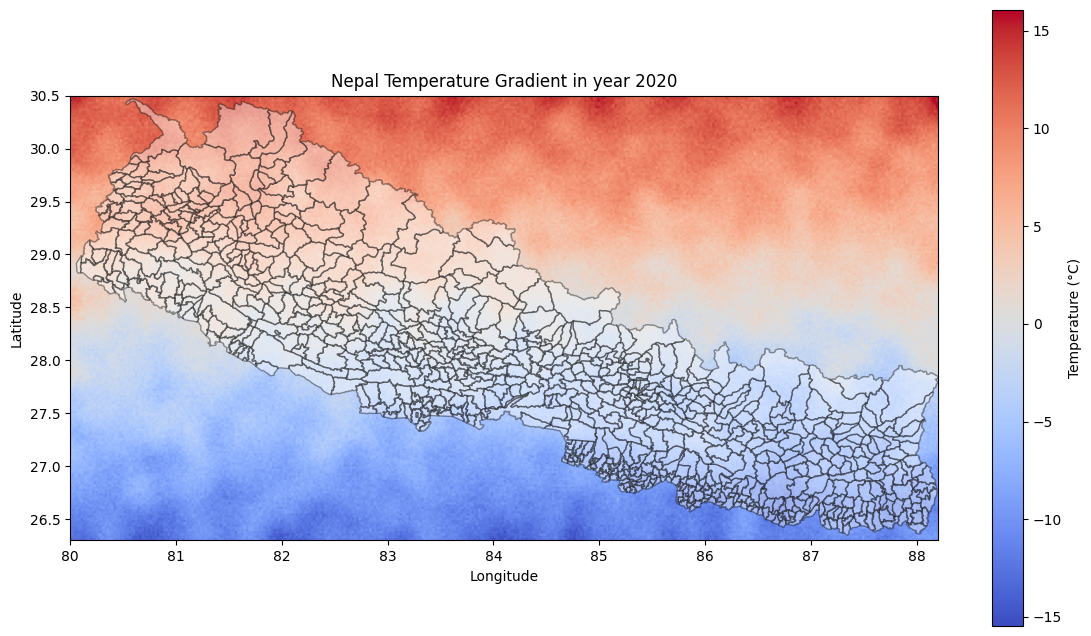

In [156]:
# Plot the temperature data using imshow and overlay on Nepal's shapefile
fig, ax = plt.subplots(figsize=(14, 8))

# Plotting Nepal map (shapefile)
df.plot(ax=ax, edgecolor="black", facecolor="white", alpha=0.4)

# Plotting temperature data (TIFF) on top of the map of Nepal's boundaries with manual color scaling
im = ax.imshow(temp_data, cmap="coolwarm", extent=[extent.left, extent.right, extent.bottom, extent.top], vmin=min_temp, vmax=max_temp)

# Adding colorbar (Legend)
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Temperature (°C)")

# Set title and labels
ax.set_title("Nepal Temperature Gradient in year 2020")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.show()

# Analysis from above Nepal's temperature gradient

- It is seen that from the data taken for analysis the plotted image shows that the temperature reaches to higher 15 degrees celcius at the north whereas the south is facing negative temperatures which is practically incorrect. Since, At the south lies the cities like Nepalgunj, Butwal, Biratnagar, Birgunj for which the temperature reaches to the max of 40-45 degrees in summers and to the north lies the Himalayas where the temperature should have been in negative.




In [70]:
#Load precipitation data from .tif file
with rasterio.open(precipitation_path_2020) as src2:
    precp_data=src2.read(4) #reading the 4rd band precipitation data
    extent_precp =src2.bounds #get the extent of precipitation raster data ie top bottom left right

#displaying the shape, extents minimum and maximum values of the raster data
print(f"The shape of the precipitaion raster data is : {precp_data.shape}")
print(f"The extent of precipitation raster data is : {extent_precp}")
min_precp=np.min(precp_data)
max_precp=np.max(precp_data)
print(f"The minimum value is : {min_precp}")
print(f"The maximum value is : {max_precp}")

The shape of the precipitaion raster data is : (200, 400)
The extent of precipitation raster data is : BoundingBox(left=80.0, bottom=26.3, right=88.2, top=30.5)
The minimum value is : 20.64714600913425
The maximum value is : 311.1281914708154


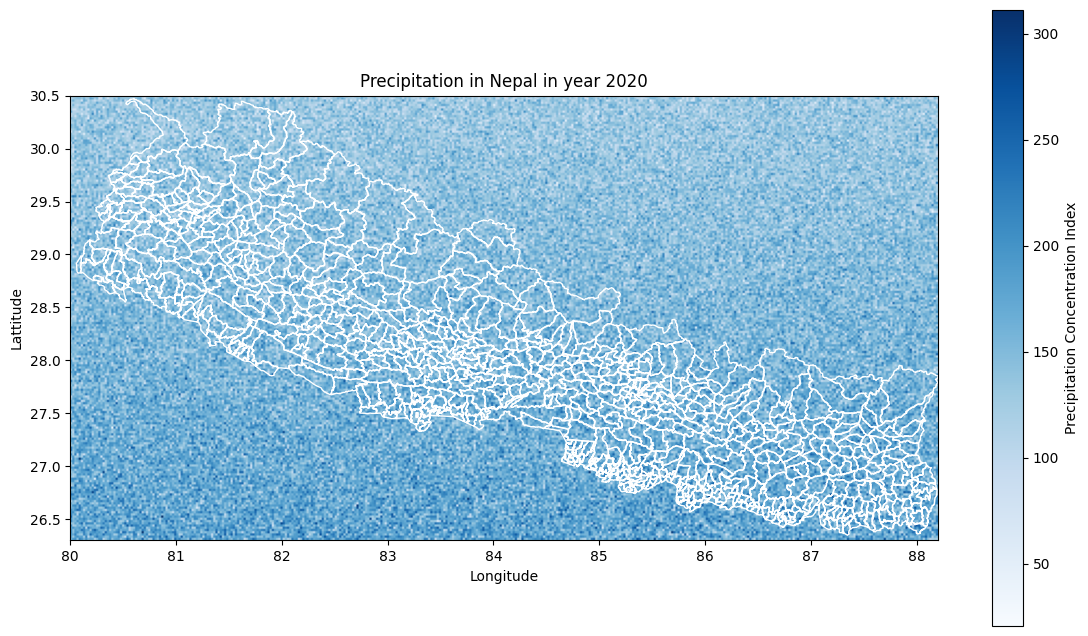

In [239]:
#plotting the Nepal's vector data(shape file) overlaying the precipitaion raster data (tif file)
fig,ax=plt.subplots(figsize=(14,8))
df.plot(ax=ax,edgecolor='white',facecolor='none',alpha = 1) #Plotting the Nepal's vector data
ax.set_title('Precipitation in Nepal in year 2020')#setting the title of the plot
ax.set_xlabel('Longitude')
ax.set_ylabel('Lattitude')

#Using the imshow function of pyplot module in matplotlib to display the data in image format (raster data)
im2=plt.imshow(precp_data,extent=[extent_precp.left,extent_precp.right,extent_precp.bottom,extent_precp.top],cmap='Blues',vmin=min_precp,vmax=max_precp)

#setting up the colorbar
cbar=plt.colorbar(im2,ax=ax)
cbar.set_label('Precipitation Concentration Index')

# Precipitation analysis in Nepal in year 2020

- By the above figure we can see the precipitation or (rainfall in mm) is lower in norther part of nepal whereas the precipitation is higher in southern part of Nepal.

- We can see from above image the northern part of nepal faces comparatively lower precipitation concentration index(PCI) ie lower than 100 mm in most pixels or areas

- The southern part has comparatively higher precipitation concentration index(PCI) ie higher than 250 mm in most pixels or areas

AttributeError: 'Axes' object has no attribute 'lineplot'

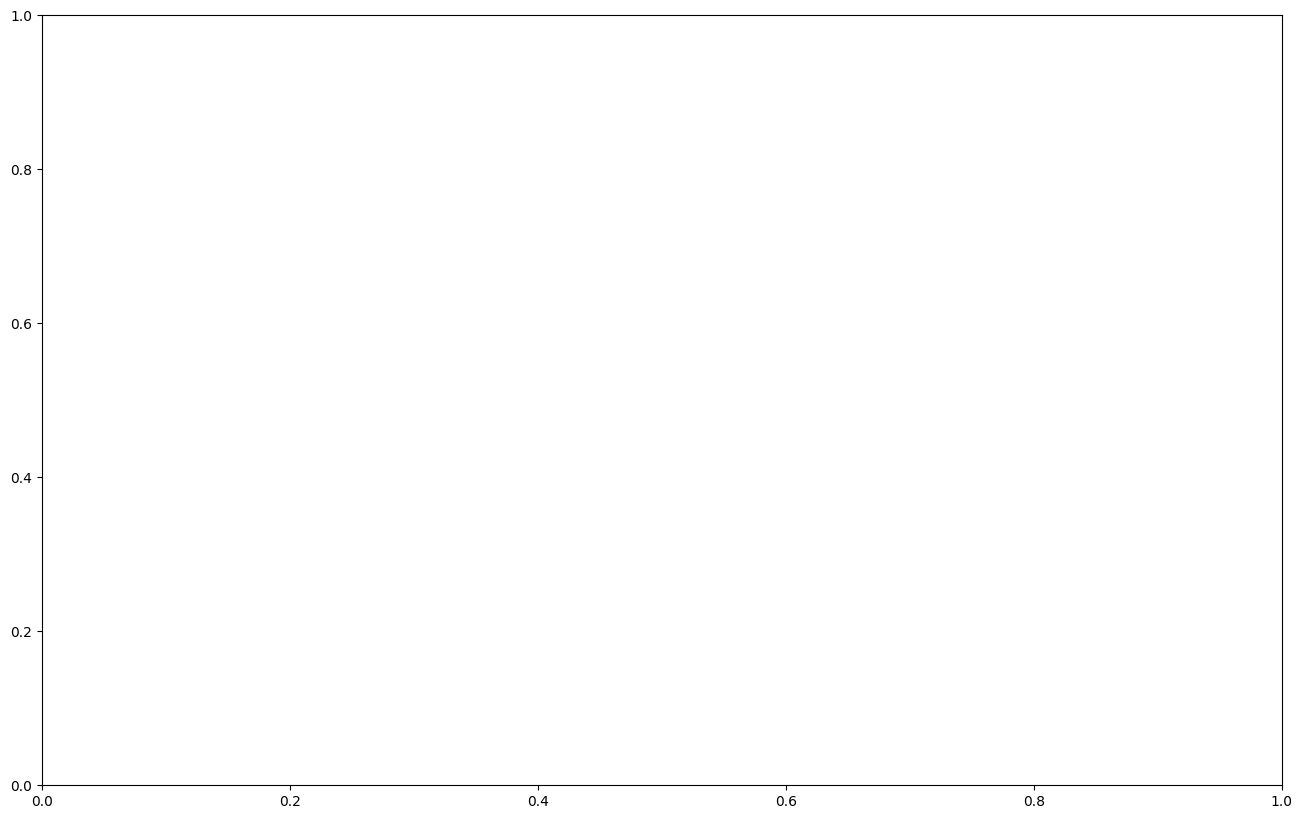

In [247]:
fig,ax=plt.subplots(figsize=(16,10))
ax.lineplot(temp_data)